<a href="https://colab.research.google.com/github/MinahilRaza/DataScience_Playground/blob/main/notebooks/GradePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Performance

I will use Machine Learning to predict the final grade of students by using the statistics collected within the entire duration of the course.

First, let's start by importing the required libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import math

# skicit-learn is a machine learning package with useful classifiers
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix

## Dataset
Please upload the given dataset for use within the notebook. Click on "Choose Files" and wait for the dataset to be uploaded. It just takes a second

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MP2_Data.csv to MP2_Data (1).csv


In [ ]:
file_name = list(uploaded.keys())[0]
try:
    df = pd.read_csv(file_name)
    print("Data loaded successfully.")
    df = df.drop('Week8_Total', axis = 1) # drop unwanted column
    df = df.drop('ID', axis = 1) # drop unwanted column
except:
    print('Please re-upload the correct file.')

Data loaded successfully.


## Step 1 : Data Processing
In this step, the data is preprocessed. Missing and duplicate values are removed. Moreover, the features are analyzed to check if all of them are required.

First, let's start off by viewing how many examples we have in our dataset

In [ ]:
print('The dataset contains ',df.shape[0], ' examples')

The dataset contains  107  examples


### Missing Values
The data is checked for NULL values. There are no missing values in the dataset so that makes our job easier.

In [ ]:
df.isnull().sum()

Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64

### Duplicates
The data is checked for duplicate rows. There is 1 duplicate in the dataset. Therefore, we will remove this

In [ ]:
duplicates = df.duplicated(subset = df.columns, keep = 'first').sum()
if duplicates == 0:
  print("There are no duplicates in the data")
else:
  print("There are ", duplicates, " duplicates in the data")
  df.drop_duplicates(subset=None, keep='first', inplace=True)
  print("Removed duplicates")

There are  1  duplicates in the data
Removed duplicates


Let's analyze the "Grade' column in our dataset.

The labels in the dataset are  0 , 2 , 3 , 4 , 5


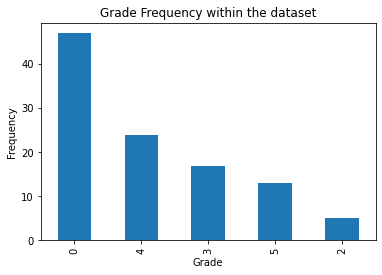

In [ ]:
grades = np.array2string(np.sort(df['Grade'].unique()), separator = ' , ')[1:-1]
print('The labels in the dataset are ' , grades)
df['Grade'].value_counts().plot(kind= 'bar');
plt.title('Grade Frequency within the dataset');
plt.xlabel('Grade');
plt.ylabel('Frequency');

The classes in our dataset are quite imbalanced. The grade '2' has only 5 occcurences.
### Feature Selection

In [ ]:
X= df[df.columns[:-1]] # all except the grade column
Y = df['Grade']

print('We have a total of ', len(X.columns) , ' features in the data')

We have a total of  45  features in the data


Having too many features in the dataset can be a problem because

1.   Too many features result in the Curse of dimensionality (problems because of too many dimensions)

2.   Curse of dimensionality results in data being sparse (especially if datapoints are too few as in our case)

3.   Data being sparse results in model overfitting

Thus to cater the curse of Dimensionality, the number of features in the data has to be reduced. Let's analyze some of the feature to decide which ones are important for the model

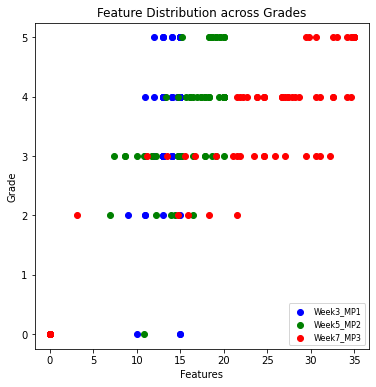

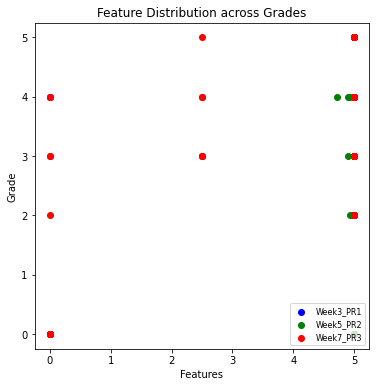

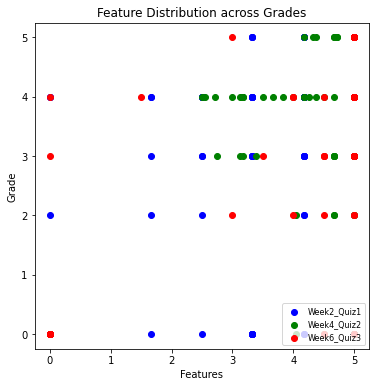

In [ ]:
# Plot the relation of some features with each Grade
matchers = ['MP', 'PR', 'Quiz']
for z, y in enumerate(matchers):
  plt.figure(figsize = (6,6))
  plt.xlabel('Features')
  plt.ylabel('Grade')
  plt.title('Feature Distribution across Grades')


  matching = [s for s in X.columns if y in s]
  colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']
  pltY = Y
  for n, i in enumerate(matching):
    pltX = X.loc[:, i]
    plt.scatter(pltX, pltY, color=colors[n], label=i)

  plt.legend(loc=4, prop={'size':8})
  plt.show()


## Step 2: Training and Testing Data
Now, we'll divide the dataset into training and testing data
The train/test ratio used here is 70/30 which means


*   Training Data --> 70 %
*   Test Data --> 30 %



In [ ]:
# One-fifth of data as a part of test set
validation_size = 0.3
seed = 8

X_train, X_test, Y_train, Y_test= model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
accuracy = []
fscore = []

## Step 3 : Train the Model
Two Machine Learning models are used.
1.   Random Forest Classifier (rfc)
2.   Naive Bayes (nb)

These models are trained in 2 ways:
1.   With all features (clf_rfc_all, clf_nb_all)
2.   With TopK features (clf_rfc_selected, clf_nb_selected)


### Random Forest Classifier

#### All features

In [ ]:
clf_rfc_all =  RandomForestClassifier(random_state=0)

In [ ]:
# Let's train our classifier
clf_rfc_all.fit(X_train, Y_train);
test_labels = clf_rfc_all.predict(X_test)
print('Test Accuracy for Random Forest with all features : ',accuracy_score(Y_test, test_labels)*100.00)
print('f1 Score for Random Forest with all features : ',f1_score(Y_test, test_labels, average = 'weighted'))
accuracy.append(accuracy_score(Y_test, test_labels))
fscore.append(f1_score(Y_test, test_labels, average = 'weighted'))

Test Accuracy for Random Forest with all features :  81.25
f1 Score for Random Forest with all features :  0.8345394736842104


In [ ]:
# Create confusion matrix
pd.crosstab(Y_test, test_labels, rownames=['Actual Grade'], colnames=['Predicted Grade'])

Predicted Grade,0,3,4,5
Actual Grade,,,,
0,15,0,0,0
3,0,2,1,0
4,0,4,7,0
5,0,1,0,2


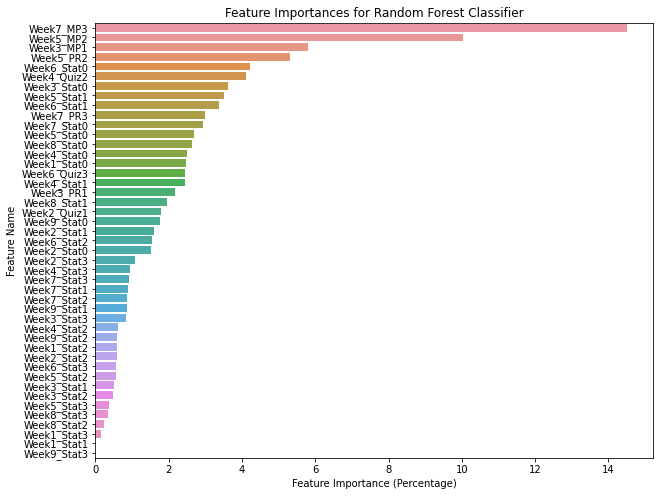

In [ ]:
fi_data={'feature_names':X_train.columns,'feature_importance':clf_rfc_all.feature_importances_}
fi_df = pd.DataFrame(fi_data)
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['feature_importance']*100, y=fi_df['feature_names'])
plt.title('Feature Importances for Random Forest Classifier');
plt.xlabel('Feature Importance (Percentage)');
plt.ylabel('Feature Name');

### Insights


1.   All the mini projects had a high feature importance. This reveals that they had a high weightage in the calculation of the final grade. MP3 had the highest weightage followed by MP2 ans then MP1
2.   The Peer reviews are also significant.
3.   The stats for Week 5 significantly affected the model performance

Now, let's take the top20 features important to the random forest classifier and analyze them

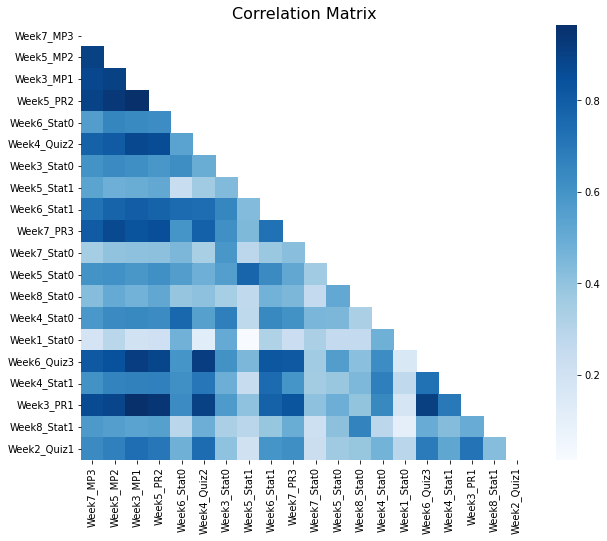

In [ ]:
best20 = list(fi_df['feature_names'][:20])
df_corr = df[best20].corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
# plot the heatmap
sns.heatmap(df_corr, 
        xticklabels=best20,
        yticklabels=best20,
        cmap="Blues",
        mask = mask)
plt.title('Correlation Matrix', fontsize=16);

From the above heatmap, we can tell that the project marks are correlated. We can combine them into a feature called project_total. We can do the same for quizzes and peer reviews. This helps in reducing the number of features.

#### Selected Features

In [ ]:
# Create combination features
X_train['MP_Total'] = X_train['Week3_MP1'] + X_train['Week5_MP2'] + X_train['Week7_MP3'];
X_train['PR_Total'] = X_train['Week3_PR1'] + X_train['Week5_PR2'] + X_train['Week7_PR3'];
X_train['Quiz_Total'] = X_train['Week2_Quiz1']+ X_train['Week4_Quiz2'] + X_train['Week6_Quiz3']; 

X_test['MP_Total'] = X_test['Week3_MP1'] + X_test['Week5_MP2'] + X_test['Week7_MP3'];
X_test['PR_Total'] = X_test['Week3_PR1'] + X_test['Week5_PR2'] + X_test['Week7_PR3'];
X_test['Quiz_Total'] = X_test['Week2_Quiz1']+ X_test['Week4_Quiz2'] + X_test['Week6_Quiz3']; 

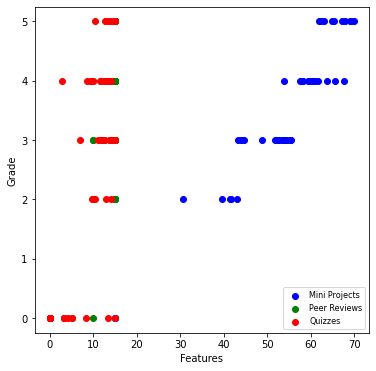

In [ ]:
# Plot the relation of some feature with each Grade
plt.figure(figsize = (6,6))
plt.xlabel('Features')
plt.ylabel('Grade')

pltX = X_train.loc[:, 'MP_Total']
pltY = Y_train
plt.scatter(pltX, pltY, color='blue', label='Mini Projects')

pltX = X_train.loc[:, 'PR_Total']
plt.scatter(pltX, pltY, color='green', label='Peer Reviews')

pltX = X_train.loc[:, 'Quiz_Total']
plt.scatter(pltX, pltY, color='red', label='Quizzes')

plt.legend(loc=4, prop={'size':8})
plt.show()


In [ ]:
clf_rfc_selected = RandomForestClassifier(random_state=50) # Combining features to get new one 


matchers = ['MP','PR', 'Quiz']
nonmatching = [s for s in best20 if not any(xs in s for xs in matchers)]

feature_set = ['MP_Total', 'PR_Total', 'Quiz_Total']
feature_set.extend(nonmatching)
print('Training Random Forest on ', len(feature_set), ' features')
clf_rfc_selected.fit(X_train[feature_set], Y_train);


Training Random Forest on  14  features


In [ ]:
test_labels = clf_rfc_selected.predict(X_test[feature_set])
print('Test Accuracy for Random Forest with selected features : ',accuracy_score(Y_test, test_labels)*100.00)
print('f1 score for Random Forest with selected features : ',f1_score(Y_test, test_labels, average = 'weighted')*100.00)
accuracy.append(accuracy_score(Y_test, test_labels))
fscore.append(f1_score(Y_test, test_labels, average = 'weighted'))


Test Accuracy for Random Forest with selected features :  87.5
f1 score for Random Forest with selected features :  88.06027164685908


In [ ]:
# Create confusion matrix
pd.crosstab(Y_test, test_labels, rownames=['Actual Grade'], colnames=['Predicted Grade'])

Predicted Grade,0,3,4,5
Actual Grade,,,,
0,15,0,0,0
3,0,3,0,0
4,0,3,8,0
5,1,0,0,2


### Naive Bayes Classifier

#### All features

In [ ]:
# Let's train the second classifier Naive Bayes
clf_nb_all = GaussianNB()
clf_nb_all.fit(X_train, Y_train)
test_labels = clf_nb_all.predict(X_test)
print('Test Accuracy for Naive Bayes with all features : ',accuracy_score(Y_test, test_labels)*100.00) 
print('f1 Score for Naive Bayes with all features : ',f1_score(Y_test, test_labels, average = 'weighted'))
accuracy.append(accuracy_score(Y_test, test_labels))
fscore.append(f1_score(Y_test, test_labels, average = 'weighted'))

Test Accuracy for Naive Bayes with all features :  59.375
f1 Score for Naive Bayes with all features :  0.5846374889478338


In [ ]:
# Create confusion matrix
pd.crosstab(Y_test, test_labels, rownames=['Actual Grade'], colnames=['Predicted Grade'])

Predicted Grade,0,2,3,4,5
Actual Grade,,,,,
0,14,0,0,1,0
3,0,0,2,0,1
4,0,3,3,1,4
5,0,0,1,0,2


In [ ]:
# Let's reduce the number of features and see if the performance of Naive Bayes improves
X_train['MP_Total'] = X_train['Week3_MP1'] + X_train['Week5_MP2'] + X_train['Week7_MP3'];
X_train['PR_Total'] = X_train['Week3_PR1'] + X_train['Week5_PR2'] + X_train['Week7_PR3'];
X_train['Quiz_Total'] = X_train['Week2_Quiz1']+ X_train['Week4_Quiz2'] + X_train['Week6_Quiz3']; 

X_test['MP_Total'] = X_test['Week3_MP1'] + X_test['Week5_MP2'] + X_test['Week7_MP3'];
X_test['PR_Total'] = X_test['Week3_PR1'] + X_test['Week5_PR2'] + X_test['Week7_PR3'];
X_test['Quiz_Total'] = X_test['Week2_Quiz1']+ X_test['Week4_Quiz2'] + X_test['Week6_Quiz3']; 


clf_nb_selected = GaussianNB();
clf_nb_selected.fit(X_train[feature_set], Y_train);

In [ ]:
test_labels = clf_nb_selected.predict(X_test[feature_set])
print('Test Accuracy for Naive Bayes with selected features : ',accuracy_score(Y_test, test_labels)*100.00) 
print('f1 Score for Naive Bayes with selected features : ',f1_score(Y_test, test_labels, average = 'weighted'))
accuracy.append(accuracy_score(Y_test, test_labels))
fscore.append(f1_score(Y_test, test_labels, average = 'weighted'))

Test Accuracy for Naive Bayes with selected features :  71.875
f1 Score for Naive Bayes with selected features :  0.7381254225828263


In [ ]:
clf_nb_selected3 = GaussianNB();
clf_nb_selected3.fit(X_train[feature_set[:3]], Y_train);

test_labels = clf_nb_selected3.predict(X_test[feature_set[:3]])
print('Test Accuracy for Naive Bayes with selected features : ',accuracy_score(Y_test, test_labels)*100.00) 
print('f1 Score for Naive Bayes with selected features : ',f1_score(Y_test, test_labels, average = 'weighted'))
accuracy.append(accuracy_score(Y_test, test_labels))
fscore.append(f1_score(Y_test, test_labels, average = 'weighted'))

Test Accuracy for Naive Bayes with selected features :  75.0
f1 Score for Naive Bayes with selected features :  0.7549603174603174


In [ ]:
# Create confusion matrix
pd.crosstab(Y_test, test_labels, rownames=['Actual Grade'], colnames=['Predicted Grade'])

Predicted Grade,0,3,4,5
Actual Grade,,,,
0,15,0,0,0
3,0,2,1,0
4,0,2,5,4
5,0,0,1,2


## Step 4: Performance Evaluation

The performance has been evaluated side-by-side in the previous section as well. All the results have been summarized in the form of a plot here.

### Model Improvement
As we saw in the previous section, initially, the model performance was satisfactory. One of the reason behind this was that the model had too many features. Therefore, I reduced the number of features and evaluated the model again.

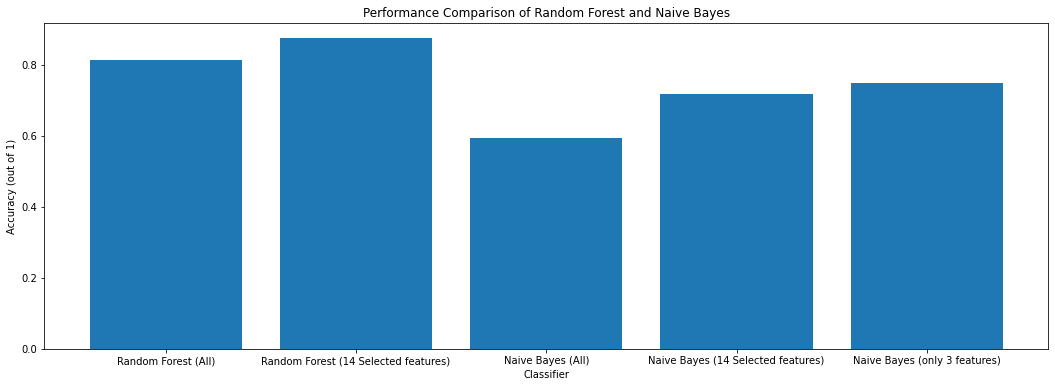

In [ ]:
# Let's plot the accuracy and see how it varies across our considered models
x = ['Random Forest (All)', 'Random Forest (14 Selected features)', 'Naive Bayes (All)', 'Naive Bayes (14 Selected features)', 'Naive Bayes (only 3 features)' ]
plt.figure(figsize = (18,6));
plt.bar(x, accuracy);
plt.title('Performance Comparison of Random Forest and Naive Bayes');
plt.xlabel('Classifier');
plt.ylabel('Accuracy (out of 1)');

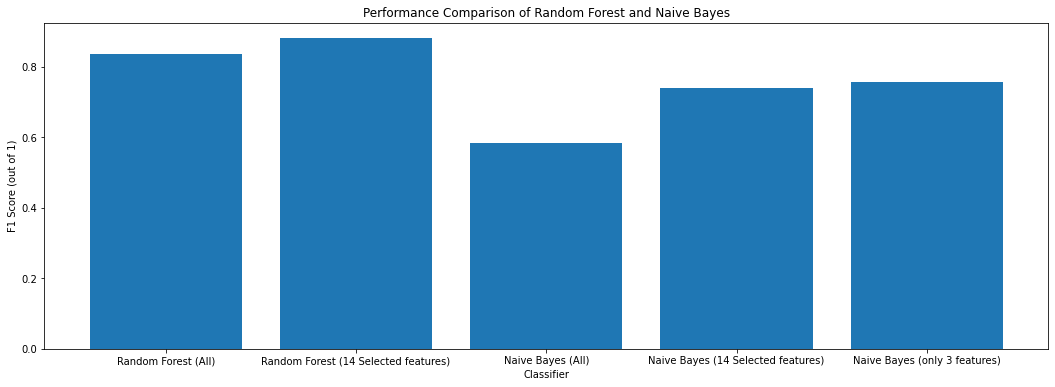

In [ ]:
plt.figure(figsize = (18,6));
plt.bar(x, fscore);
plt.title('Performance Comparison of Random Forest and Naive Bayes');
plt.xlabel('Classifier');
plt.ylabel('F1 Score (out of 1)');

## Step 5: Important Features
The threemost important features are the marks of the three mini projects
1. Week7_MP3
2. Week5_MP2
3. Week3_MP1